In [7]:
import numpy
import networkx
from matplotlib import pyplot as plt

In [4]:
data = numpy.genfromtxt('m.csv', delimiter=',')

In [5]:
data.shape

(82, 82)

In [12]:
network = networkx.from_numpy_matrix(data)

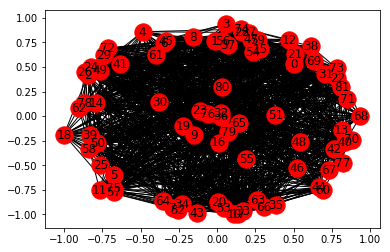

In [13]:
networkx.draw_networkx(network)
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test():
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

#     g = nx.karate_club_graph()
    partition = community_louvain.best_partition(network)
    pos = community_layout(network, partition)
    p = partition.copy()

    nx.draw_networkx(network, pos, node_color=list(partition.values()),node_size = 5000,font_size = 70)
    fig = plt.gcf()
    fig.set_size_inches(18.5*5, 10.5*5)
    fig.savefig('test.png', dpi=100)
    return p

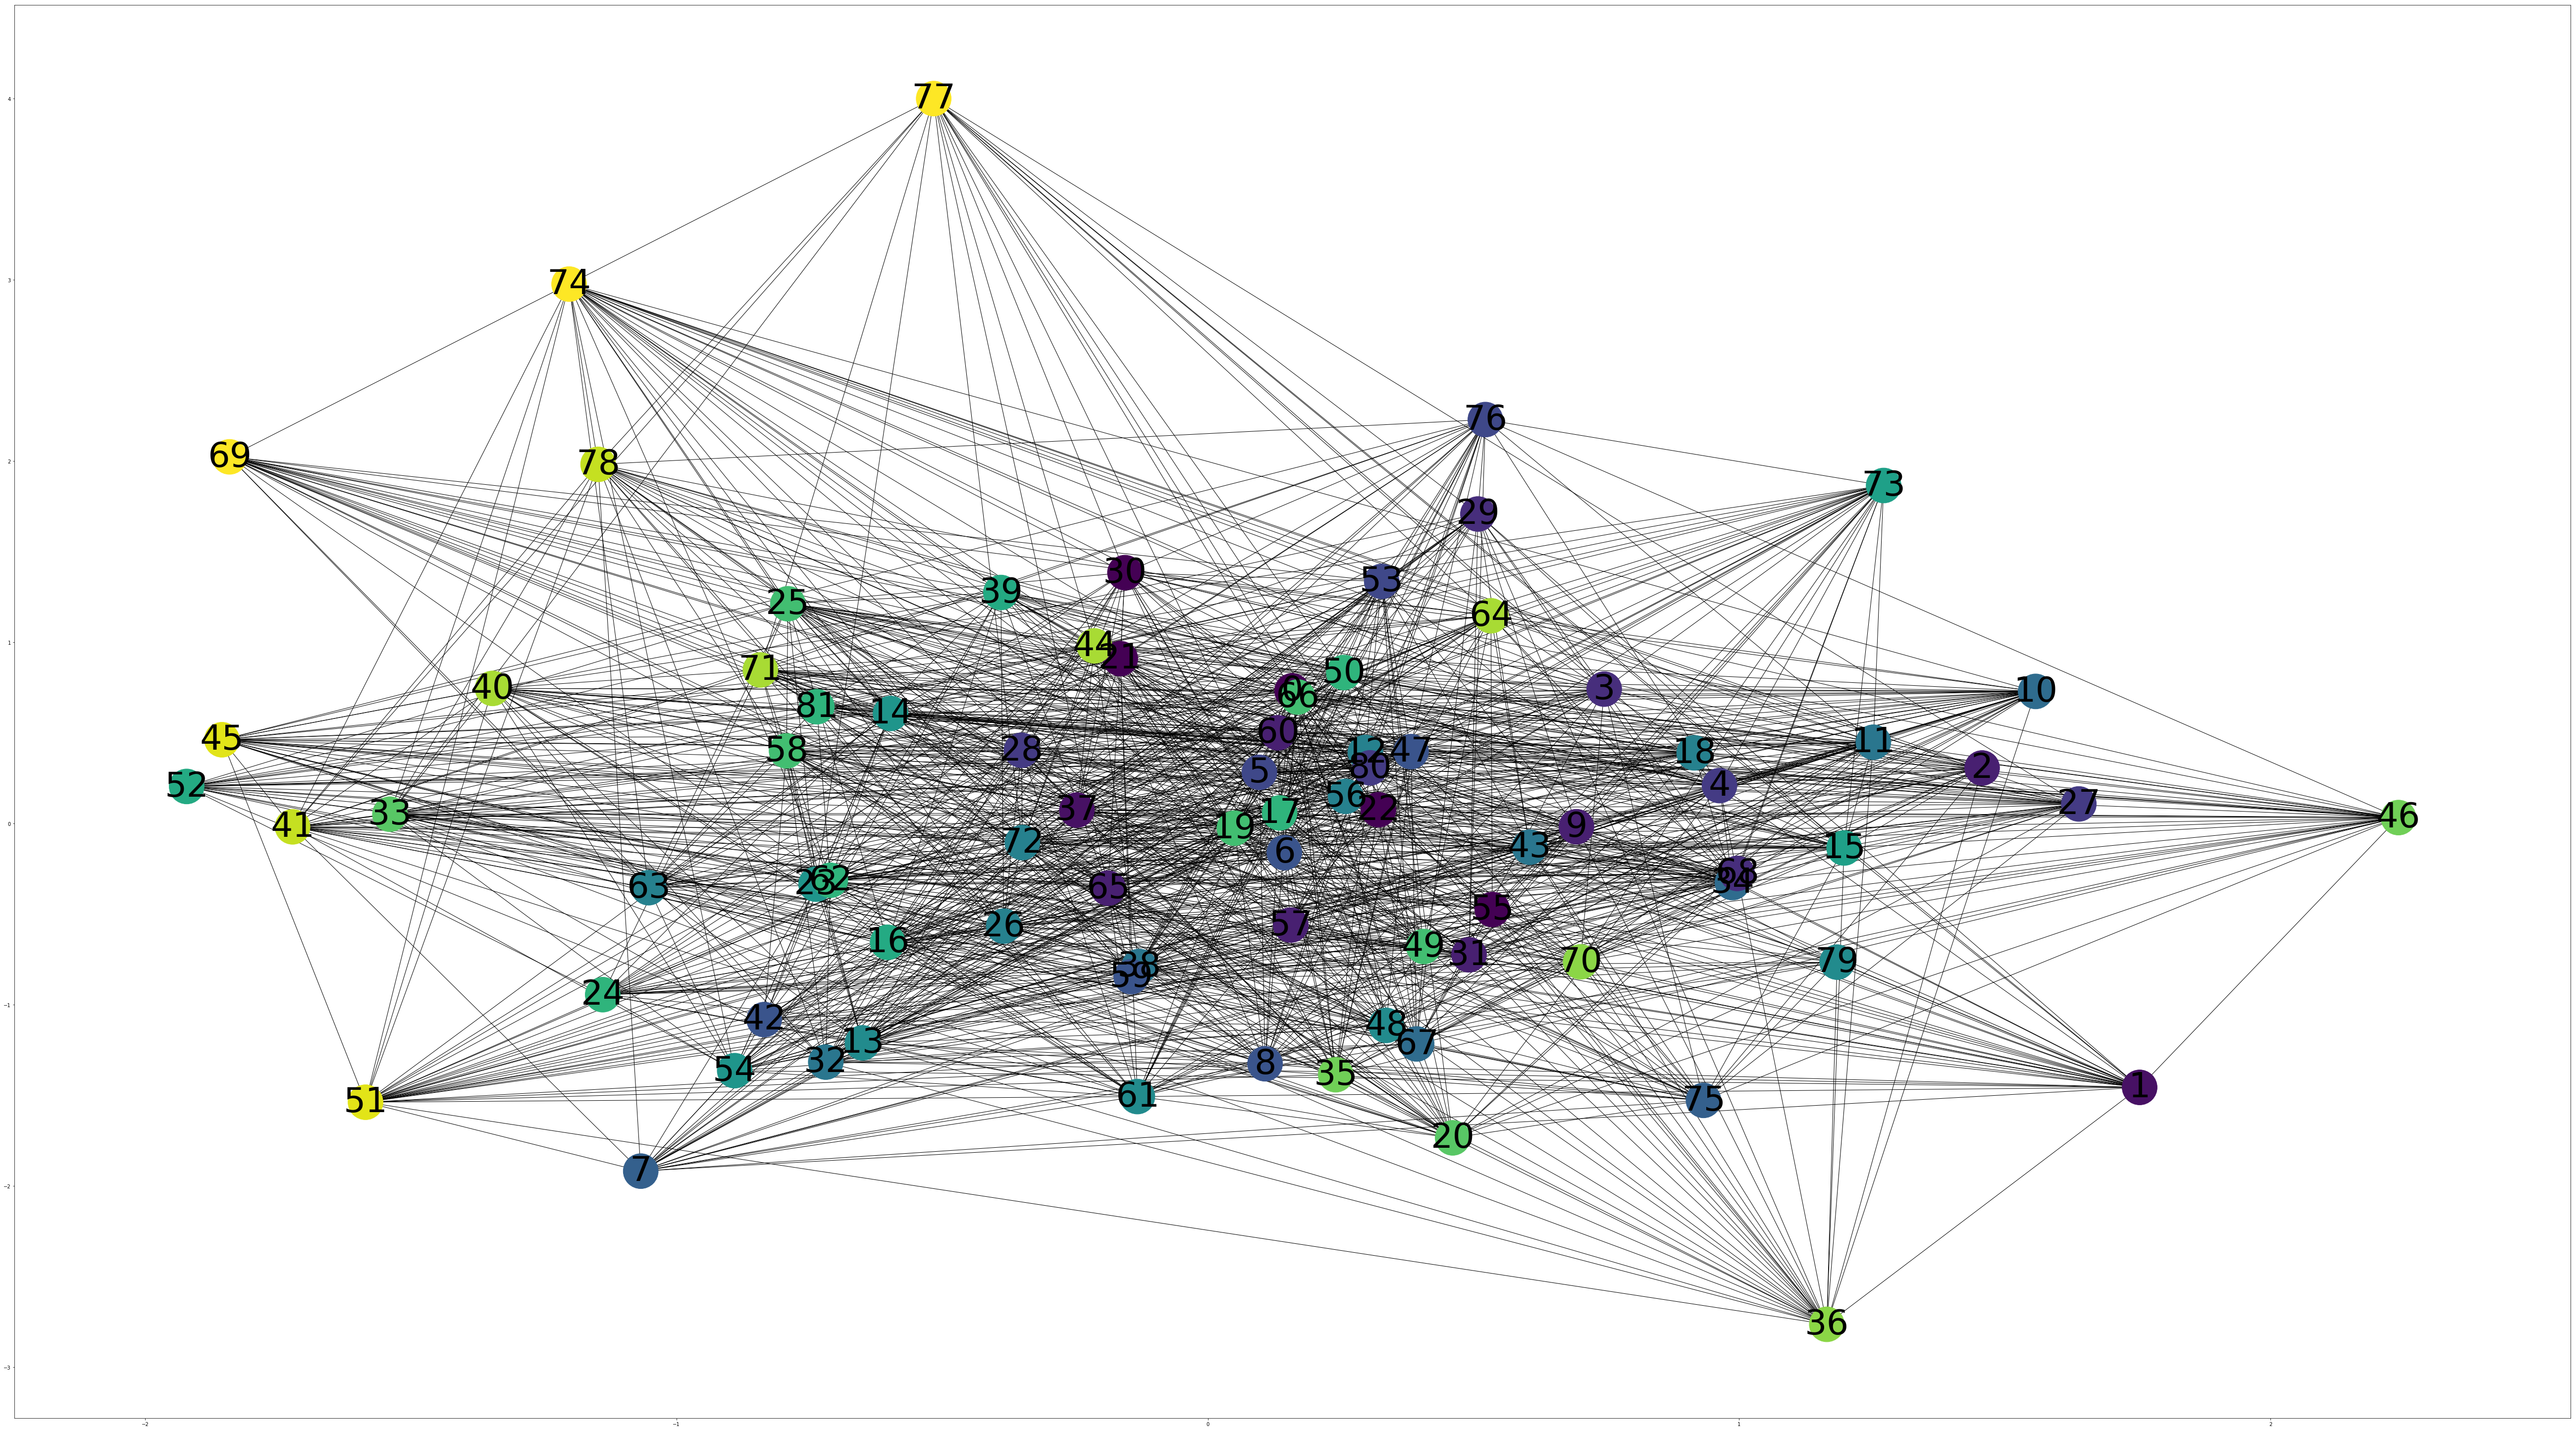

In [22]:
p = test()

c:\users\esysss\appdata\local\programs\python\python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


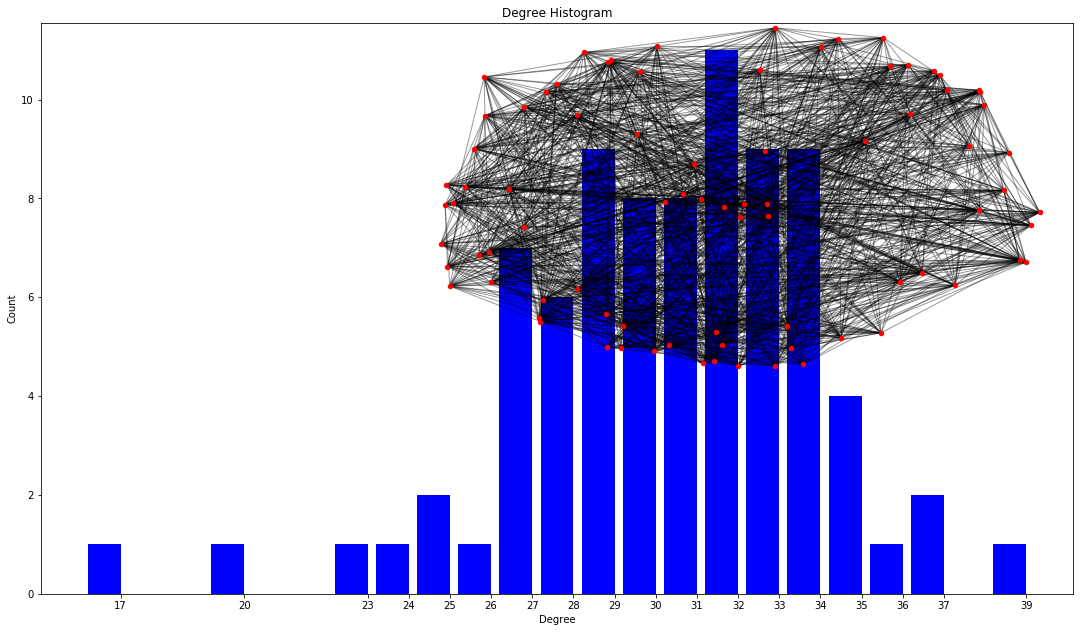

In [61]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

G = network

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test1.png', dpi=100)
plt.show()

In [34]:
networkx.community.modularity(network,[{1,2,3},{4,5,6}])

NotAPartition:  is not a valid partition of the graph [{1, 2, 3}, {4, 5, 6}]

In [30]:
networkx.community.label_propagation_communities(G)

<generator object label_propagation_communities at 0x000002304636BC78>

In [35]:
import networkx.algorithms.community as nx_comm
G = nx.barbell_graph(3, 0)
nx_comm.modularity(G, [{0, 1, 2}, {3, 4, 5}])
0.35714285714285715
nx_comm.modularity(G, nx_comm.label_propagation_communities(G))

NotAPartition:  is not a valid partition of the graph <generator object label_propagation_communities at 0x000002304636BDE0>

In [58]:
communities = max(p.values())
communiites = [[] for i in range(communities+1)]

for i in p:
    communiites[p[i]].append(i)

In [60]:
nx_comm.modularity(network, communiites)

1.1716822051373663

In [41]:
label = list(label)